<a href="https://colab.research.google.com/github/Achiever-caleb/PhoneScreenAnalysis/blob/main/phonescreen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## INTRODUCTION

This DataSet Contains Detailed Insights into Mobile App Usage Patterns, including ScreenTime, notifications received, and app openings. The data spans multiple days in August and some popular apps, offering a granular view of digital behavior.

Features:
1. Date: The date of the recorded data.
2. App: The name of the mobile application.
3. Usage (minutes): Total minutes spent using the app on a given day.
4. Notifications: Number of notifications received from the app.
5. Times Opened: How many times the app was launched.

## DATA WRANGLING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
screen_df = pd.read_csv("/content/screentime_analysis.csv")
screen_df.head()

,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16


In [3]:
screen_df["App"].unique()

array(['Instagram', 'X', 'WhatsApp', '8 Ball Pool', 'Safari', 'Netflix',
       'Facebook', 'LinkedIn'], dtype=object)

In [4]:
screen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             200 non-null    object
 1   App              200 non-null    object
 2   Usage (minutes)  200 non-null    int64 
 3   Notifications    200 non-null    int64 
 4   Times Opened     200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [5]:
screen_df.describe()

,Usage (minutes),Notifications,Times Opened
count,200.000000,200.000000,200.00000
mean,37.750000,28.735000,21.63000
std,29.711299,35.801726,24.27301
min,1.000000,0.000000,1.00000
25%,17.000000,1.750000,4.00000
50%,26.000000,11.500000,10.00000
75%,51.250000,47.000000,32.00000
max,119.000000,147.000000,99.00000


## Data Cleaning

We will drop the date column as we don't need it for our analysis

In [6]:
screen_df.drop("Date", axis=1, inplace=True)

In [7]:
screen_df.head()

,App,Usage (minutes),Notifications,Times Opened
0,Instagram,81,24,57
1,Instagram,90,30,53
2,Instagram,112,33,17
3,Instagram,82,11,38
4,Instagram,59,47,16


#Data Visualization

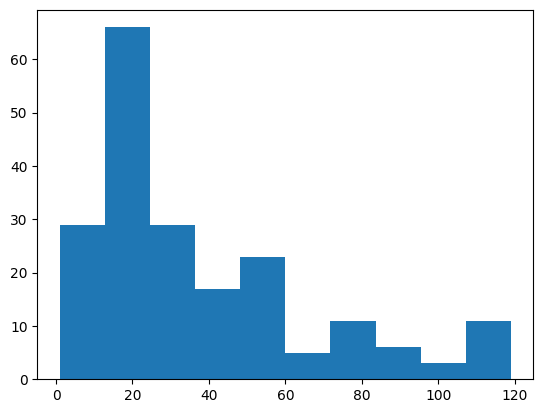

In [8]:
plt.hist(screen_df['Usage (minutes)'])
plt.show()

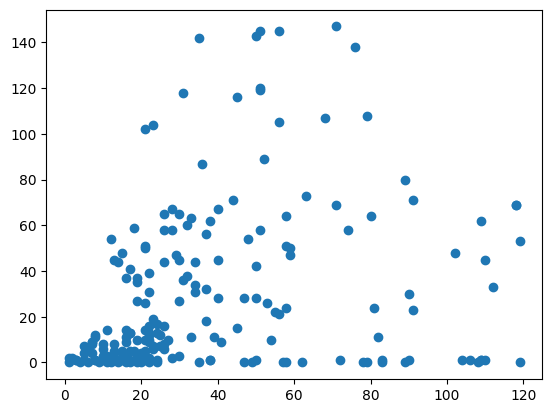

In [9]:
plt.scatter(screen_df['Usage (minutes)'], screen_df['Notifications'])
plt.show()

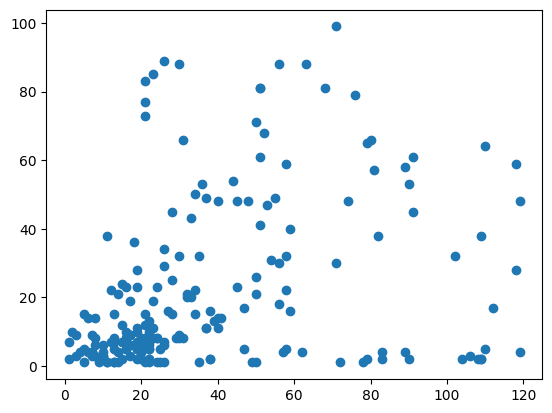

In [10]:
plt.scatter(screen_df['Usage (minutes)'], screen_df['Times Opened'])
plt.show()

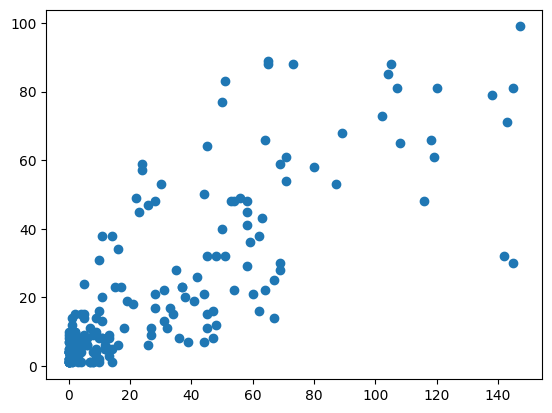

In [11]:
plt.scatter(screen_df['Notifications'], screen_df['Times Opened'])
plt.show()

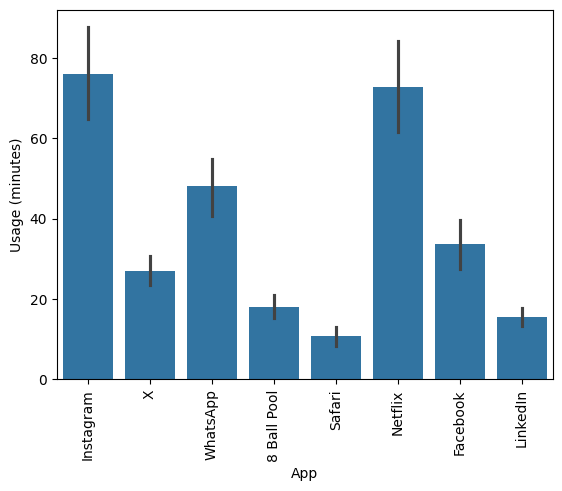

In [12]:
sns.barplot(x='App', y='Usage (minutes)', data=screen_df)
plt.xticks(rotation=90)
plt.show()

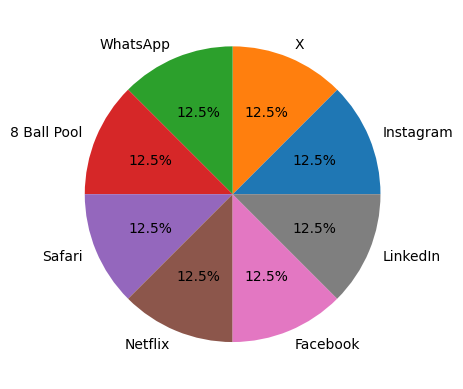

In [13]:
plt.pie(screen_df['App'].value_counts(), labels=screen_df['App'].value_counts().index, autopct='%1.1f%%')
plt.show()

<Axes: xlabel='Usage (minutes)', ylabel='App'>

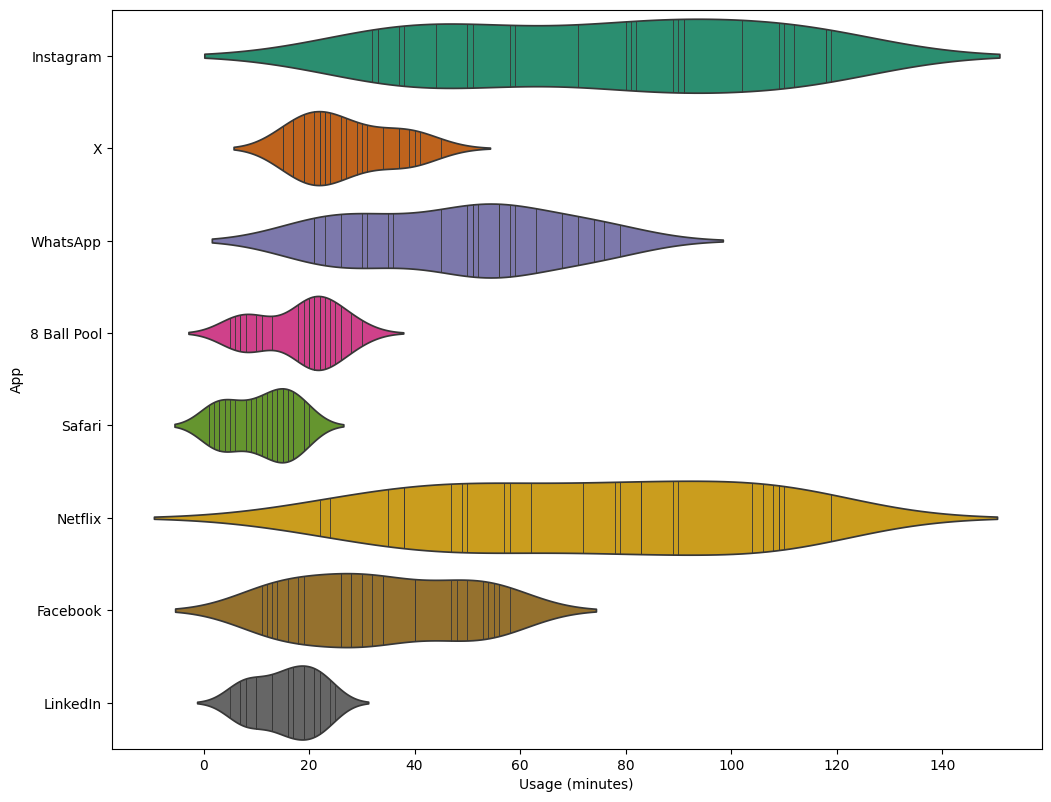

In [17]:
figsize = (12, 1.2 * len(screen_df['App'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(screen_df, x='Usage (minutes)', y='App', hue='App', inner='stick', palette='Dark2', legend=False)
sns.despine(top=True, right=True, bottom=True, left=True)

In [18]:
screen_df.select_dtypes(include='number').corr()

,Usage (minutes),Notifications,Times Opened
Usage (minutes),1.000000,0.276053,0.324471
Notifications,0.276053,1.000000,0.801920
Times Opened,0.324471,0.801920,1.000000


##Data Preprocessing

In [19]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the data
encoded_data = encoder.fit_transform(screen_df[["App"]])  # Ensure 2D input

# Combine encoded data with feature names
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(["App"]))

# Display the result
print(encoded_df)



     App_8 Ball Pool  App_Facebook  App_Instagram  App_LinkedIn  App_Netflix  \
0                0.0           0.0            1.0           0.0          0.0   
1                0.0           0.0            1.0           0.0          0.0   
2                0.0           0.0            1.0           0.0          0.0   
3                0.0           0.0            1.0           0.0          0.0   
4                0.0           0.0            1.0           0.0          0.0   
..               ...           ...            ...           ...          ...   
195              0.0           0.0            0.0           1.0          0.0   
196              0.0           0.0            0.0           1.0          0.0   
197              0.0           0.0            0.0           1.0          0.0   
198              0.0           0.0            0.0           1.0          0.0   
199              0.0           0.0            0.0           1.0          0.0   

     App_Safari  App_WhatsApp  App_X  


In [21]:
screen_df_encoded=pd.concat([screen_df, encoded_df], axis=1)
screen_df_encoded.head()

,App,Usage (minutes),Notifications,Times Opened,App_8 Ball Pool,App_Facebook,App_Instagram,App_LinkedIn,App_Netflix,App_Safari,App_WhatsApp,App_X
0,Instagram,81,24,57,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Instagram,90,30,53,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Instagram,112,33,17,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Instagram,82,11,38,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Instagram,59,47,16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [32]:
screen_df_encoded=screen_df_encoded.drop("App", axis=1, inplace=True)

KeyError: "['App'] not found in axis"

In [33]:
y= screen_df_encoded['Usage (minutes)']
x= screen_df_encoded.drop('Usage (minutes)', axis=1)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
X_train

array([[0.06122449, 0.02040816, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01360544, 0.04081633, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11564626, 0.2244898 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.03401361, 0.05102041, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04081633, 0.05102041, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01360544, 0.09183673, 0.        , ..., 1.        , 0.        ,
        0.        ]])

## Model Training

Since the dataset is small, we will be using Decision tree Regressor,  Support Vector Regressor, Random Forest and Then employ ensembling Voting.

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [68]:
dt_model = DecisionTreeRegressor(random_state = 42, max_depth=4)
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=4, random_state=42)

In [69]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 398.8042240509354
R-squared: 0.41876076377796345
Root Mean Squared Error: 19.970083225939128


In [54]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [56]:
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 375.6077065887078
R-squared: 0.4525686456399025
Root Mean Squared Error: 19.38060129585013


In [58]:
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

In [64]:
svr2 = SVR(kernel='poly', C=100, degree=2, epsilon=0.1, coef0=1)
svr2.fit(X_train, y_train)

SVR(C=100, coef0=1, degree=2, kernel='poly')

In [60]:
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 324.6965507362651
R-squared: 0.526769367593829
Root Mean Squared Error: 18.01933824357224


In [66]:
y_pred = svr2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 346.39053495991766
R-squared: 0.4951513604105393
Root Mean Squared Error: 18.61156992195762


## Using stacking in Heterogenous ensembling

In [67]:
from sklearn.ensemble import StackingRegressor

In [94]:
base_regressor = [("RF",rf_model), ("SVR_rbf",svr), ("SVR_poly",svr2)]

In [95]:
from sklearn.linear_model import Ridge

In [96]:
# Define the meta-model
meta_regressor = Ridge(alpha=1.0)

# Create the Stacking Regressor
stack_reg = StackingRegressor(estimators=base_regressor, final_estimator=meta_regressor)

# Train the stacking regressor
stack_reg.fit(X_train, y_train)

StackingRegressor(estimators=[('RF', RandomForestRegressor(random_state=42)),
                              ('SVR_rbf', SVR(C=100, gamma=0.1)),
                              ('SVR_poly',
                               SVR(C=100, coef0=1, degree=2, kernel='poly'))],
                  final_estimator=Ridge())

In [97]:
y_pred = stack_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 336.794037343559
R-squared: 0.5091378244662121
Root Mean Squared Error: 18.35194914289921


## Conclusion

From the above model, we tried to use different models including ensemble method, but from our work we can clearly see that the svr_rbf happens to have the best result among all the technique we employed.